In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the dataset 

df = pd.read_csv('C:/Users/mosel/Documents/PYTHON/PowerPulse Household Energy Usage Forecast/household_power_consumption.txt', sep=';', low_memory=False, na_values=['nan','?'])

In [3]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [4]:
df.shape

(2075259, 9)

In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
#Check for missing values

df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
#Drop the null values

df.dropna(inplace=True)

In [8]:
# Check for the missing values again to confirm that they have been dropped 

df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y",errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S",errors='coerce').dt.time

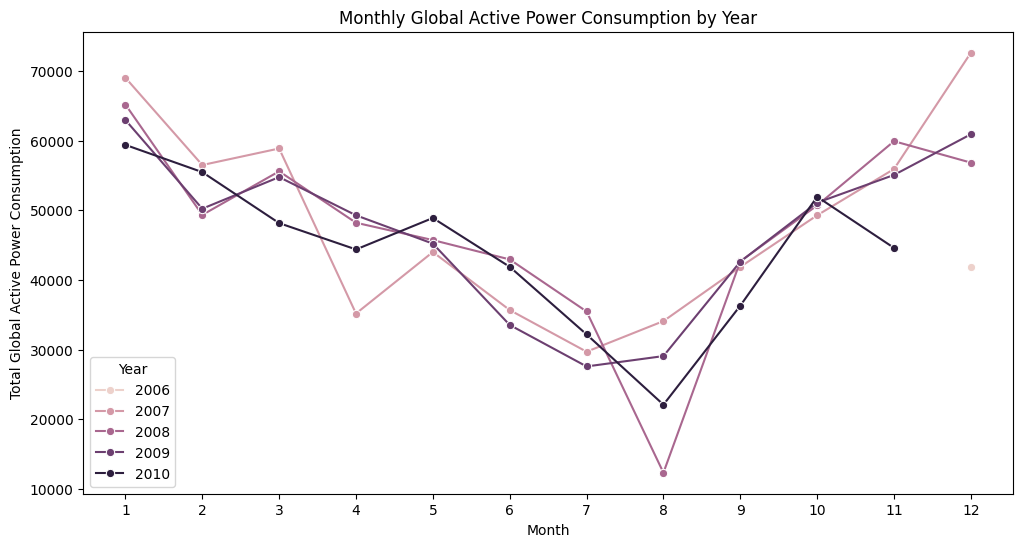

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group data by year and month, and calculate the sum of 'Global_active_power'
monthly_consumption = df.groupby(['Year', 'Month'])['Global_active_power'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Global_active_power', hue='Year',data=monthly_consumption, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Global Active Power Consumption')
plt.title('Monthly Global Active Power Consumption by Year')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()

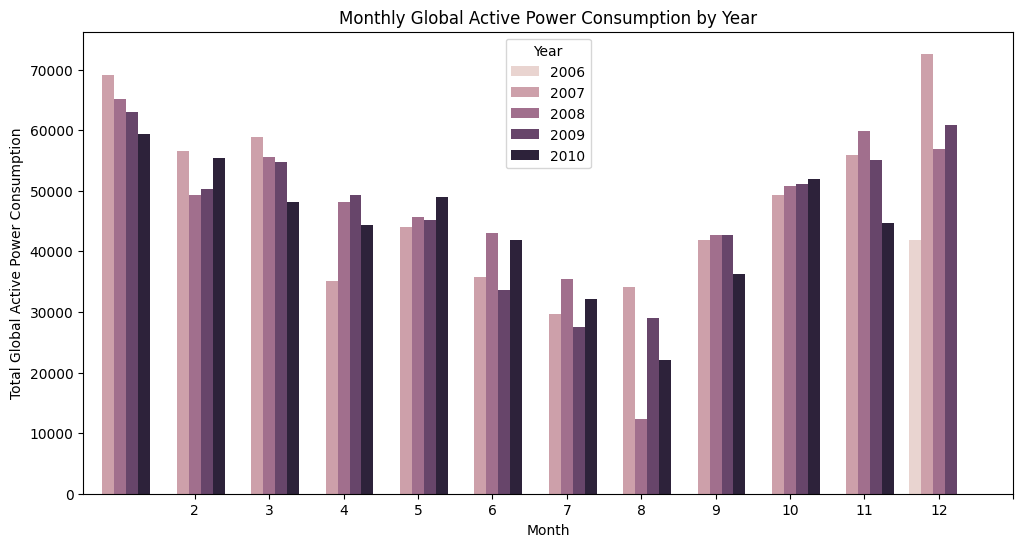

In [11]:

# Create the bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Global_active_power', hue='Year', data=monthly_consumption)
plt.xlabel('Month')
plt.ylabel('Total Global Active Power Consumption')
plt.title('Monthly Global Active Power Consumption by Year')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()

In [12]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

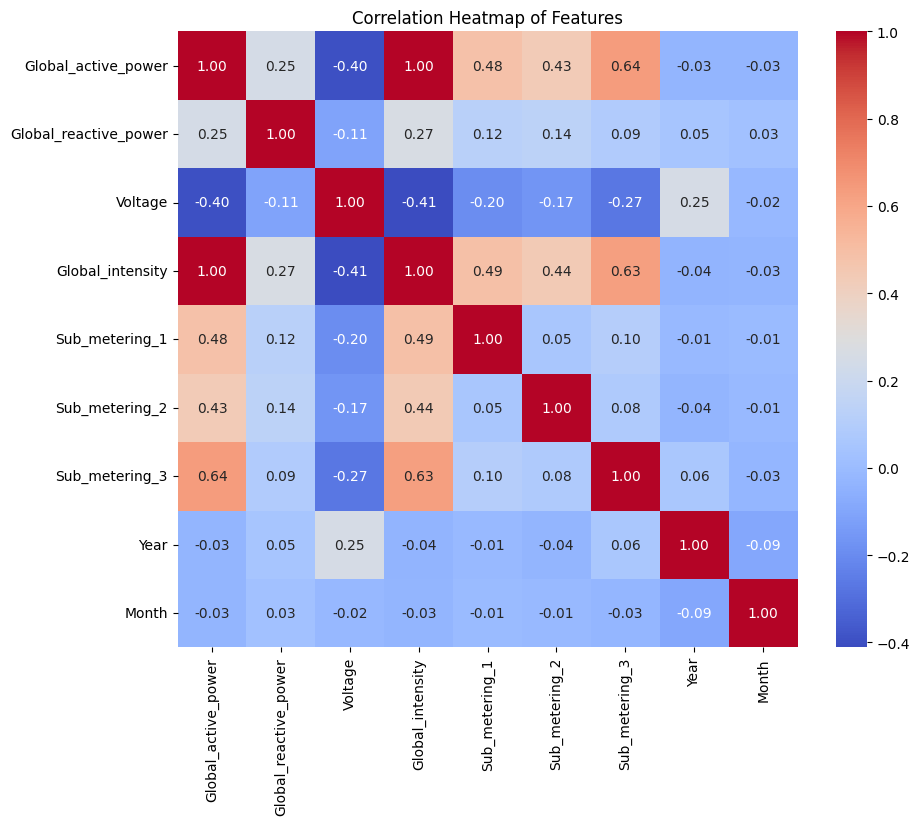

In [13]:
# Draw the heatmap for all the features in the dataset

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

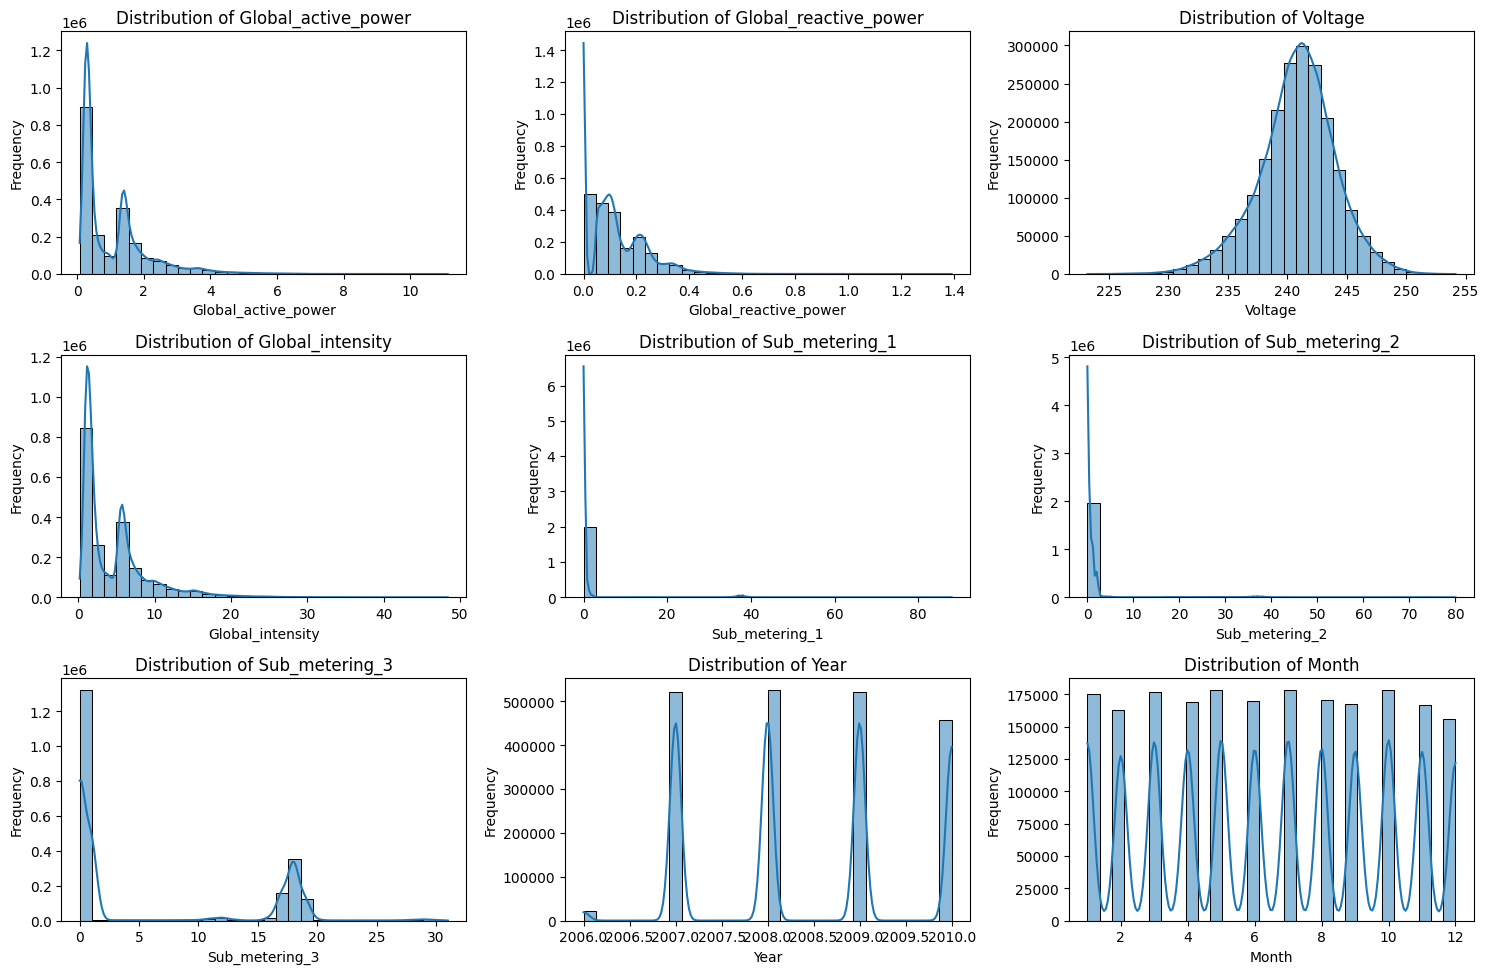

In [14]:
# Draw the distribution plot for all the features in the dataset

plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Regression Algorithm

1.Linear Regression.


MODEL 1

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=['Global_active_power','Sub_metering_3'])
y = df['Global_active_power']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model_1_lr = LinearRegression()

model_1_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred1_lr = model_1_lr.predict(X_test)
y_pred1_lr


array([1.52942966, 0.39619783, 0.66333776, ..., 2.27617263, 2.2419846 ,
       1.71305494], shape=(676263,))

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [22]:
print("Linear Regression MODEL 1")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred1_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred1_lr)))
print("R2 Score:", r2_score(y_test, y_pred1_lr))

Linear Regression MODEL 1
Mean Absolute Error: 0.027392542795707728
Mean Squared Error: 0.0017932226247148058
Root Mean Squared Error: 0.04234645941179505
R2 Score: 0.9983994663890539


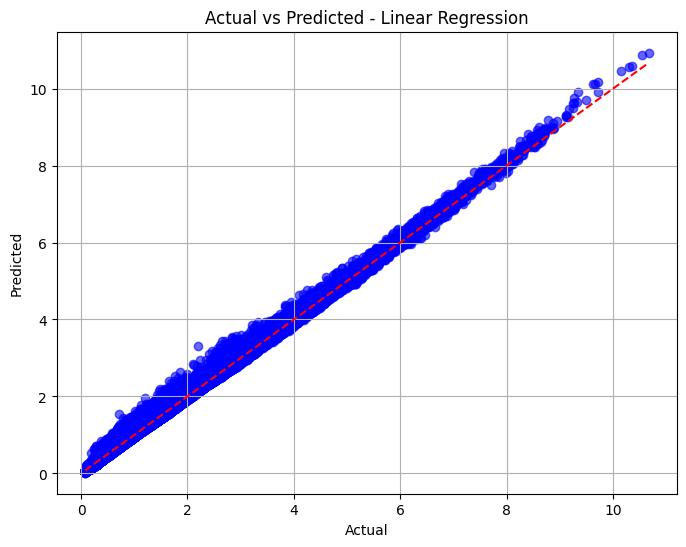

In [23]:
#Plot Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()

MODEL 2

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X= df.drop(columns=['Global_intensity'])
y= df['Global_intensity']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

model_2_lr = LinearRegression()

model_2_lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred2_lr = model_2_lr.predict(X_test)
y_pred2_lr

array([6.2235912 , 1.70065117, 2.84605998, ..., 9.33650796, 9.79254756,
       7.39161569], shape=(676263,))

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
print("Linear Regression MODEL 2:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred2_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred2_lr)))
print("R2 Score:", r2_score(y_test, y_pred2_lr))


Linear Regression MODEL 2:
Mean Absolute Error: 0.10776782492545516
Mean Squared Error: 0.0287466056156579
Root Mean Squared Error: 0.16954823978932337
R2 Score: 0.9985479088919572


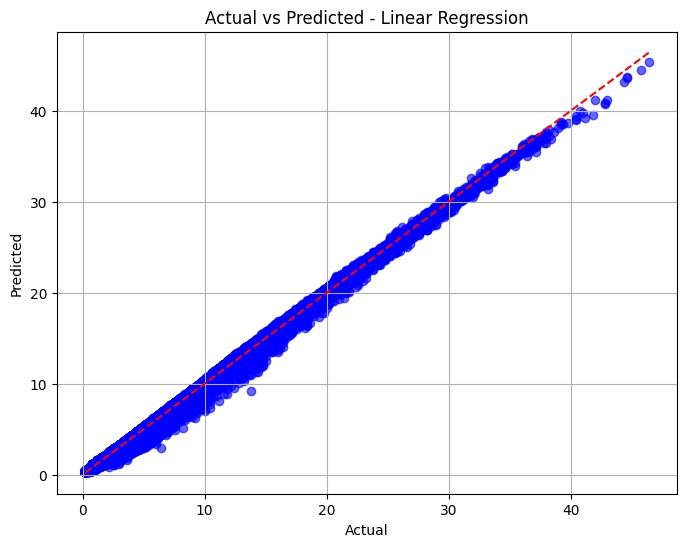

In [31]:
#Plot Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()

MODEL 3

In [32]:
from sklearn.model_selection import train_test_split

X= df.drop(columns=['Global_intensity','Sub_metering_3'])
y= df['Global_intensity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
model_3_lr = LinearRegression()

model_3_lr.fit(X_train, y_train)


LinearRegression()

In [34]:
y_pred3_lr = model_3_lr.predict(X_test)
y_pred3_lr

array([6.27841266, 1.71208999, 2.82959515, ..., 9.34000943, 9.71434167,
       7.42810106], shape=(676263,))

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
print("Linear Regression MODEL 3:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred3_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred3_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred3_lr)))
print("R2 Score:", r2_score(y_test, y_pred3_lr))


Linear Regression MODEL 3:
Mean Absolute Error: 0.11220240343645177
Mean Squared Error: 0.03054793607619131
Root Mean Squared Error: 0.17477967867058034
R2 Score: 0.9984569174204994


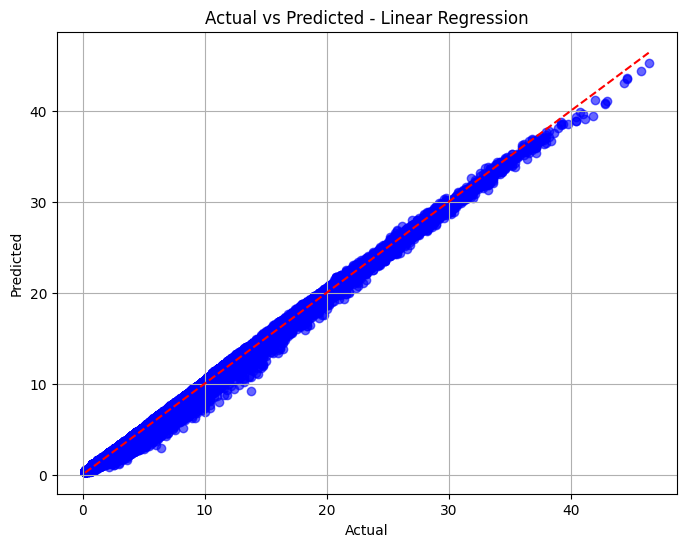

In [37]:
#Plot Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()

2.Random forest Regression

MODEL 1

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(columns=['Global_active_power','Sub_metering_3'])
y = df['Global_active_power']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:

from sklearn.ensemble import RandomForestRegressor

In [42]:
model_1_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_1_rf.fit(X_train, y_train)
y_pred1_rf = model_1_rf.predict(X_test)
y_pred1_rf

array([1.51654, 0.38856, 0.62426, ..., 2.2569 , 2.2758 , 1.72528],
      shape=(676263,))

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
print("Random Forest Regression MODEL 1:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred1_rf))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred1_rf))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred1_rf)))
print("R2 Score:",r2_score(y_test, y_pred1_rf))


Random Forest Regression MODEL 1:
Mean Absolute Error: 0.015629224747105656
Mean Squared Error: 0.0009560172595676894
Root Mean Squared Error: 0.03091952877337702
R2 Score: 0.9991467106562822


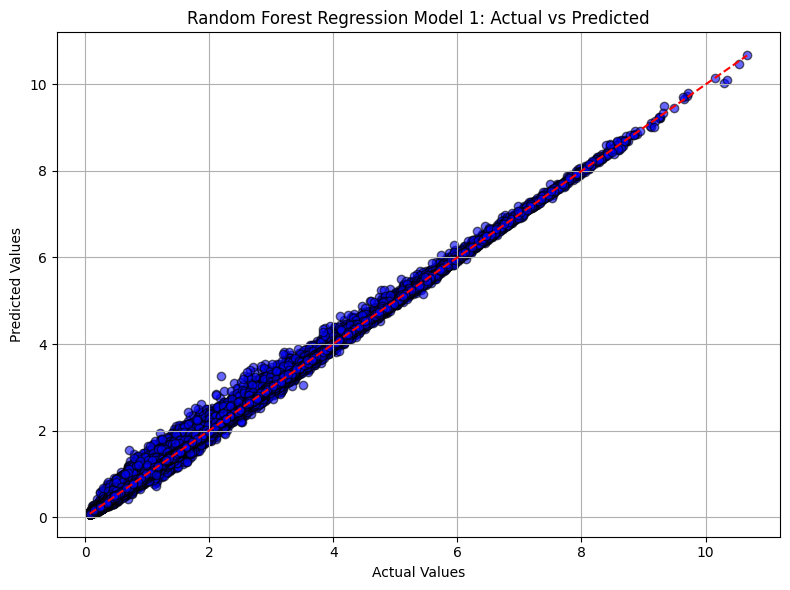

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1_rf, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

MODEL 2

In [46]:
X = df.drop(columns=['Global_intensity','Sub_metering_3'])
y = df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:

from sklearn.ensemble import RandomForestRegressor
model_2_rf = RandomForestRegressor()
model_2_rf.fit(X_train,y_train)

y_pred2_rf = model_2_rf.predict(X_test)

In [48]:
print(" Random Forset Regression MODEL 2:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred2_rf))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred2_rf))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred2_rf)))
print("R2 Score:",r2_score(y_test, y_pred2_rf))


 Random Forset Regression MODEL 2:
Mean Absolute Error: 0.05370506974000453
Mean Squared Error: 0.015577283971286437
Root Mean Squared Error: 0.1248089899457825
R2 Score: 0.9992131371667116


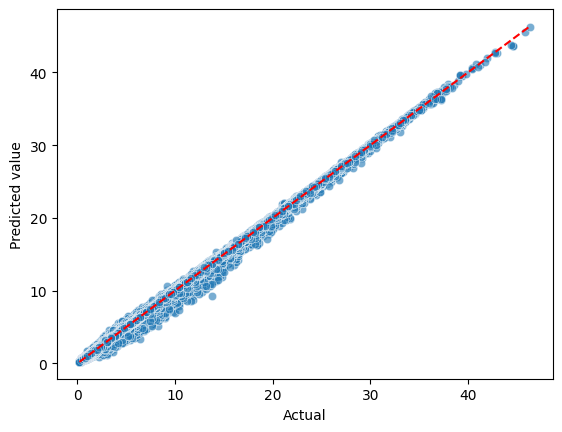

In [49]:

sns.scatterplot(x=y_test, y=y_pred2_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted value')
plt.show()

MODEL 3

In [50]:
X= df.drop(columns=['Global_intensity'])
y= df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
model_3_rf = RandomForestRegressor()
model_3_rf.fit(X_train,y_train)

y_pred3_rf= model_3_rf.predict(X_test)

In [52]:
print(" Random Forset Regression MODEL 3:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred3_rf))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred3_rf))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred3_rf)))
print("R2 Score:",r2_score(y_test, y_pred3_rf))


 Random Forset Regression MODEL 3:
Mean Absolute Error: 0.05073386538081398
Mean Squared Error: 0.014476983082573777
Root Mean Squared Error: 0.12032033528283478
R2 Score: 0.999268717194421


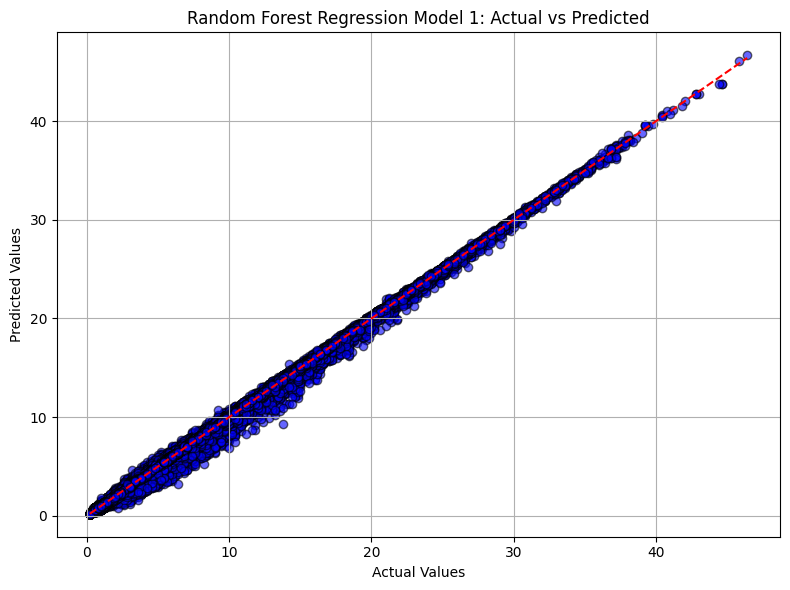

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3_rf, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


3.Gradient Boosting

MODEL 1

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Global_active_power','Sub_metering_3'])
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 

In [55]:

from sklearn.ensemble import GradientBoostingRegressor

model_1_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_1_gb.fit(X_train, y_train)
y_pred1_gb = model_1_gb.predict(X_test)
y_pred1_gb


array([1.54239863, 0.3817708 , 0.65653854, ..., 2.249089  , 2.27417584,
       1.72709812], shape=(676263,))

In [56]:
print("Gradient Boosting Regression MODEL 1:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred1_gb))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred1_gb))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred1_gb)))
print("R2 Score:",r2_score(y_test, y_pred1_gb))


Gradient Boosting Regression MODEL 1:
Mean Absolute Error: 0.020899858012418965
Mean Squared Error: 0.0011877416316430022
Root Mean Squared Error: 0.03446362766226159
R2 Score: 0.9989398860039105


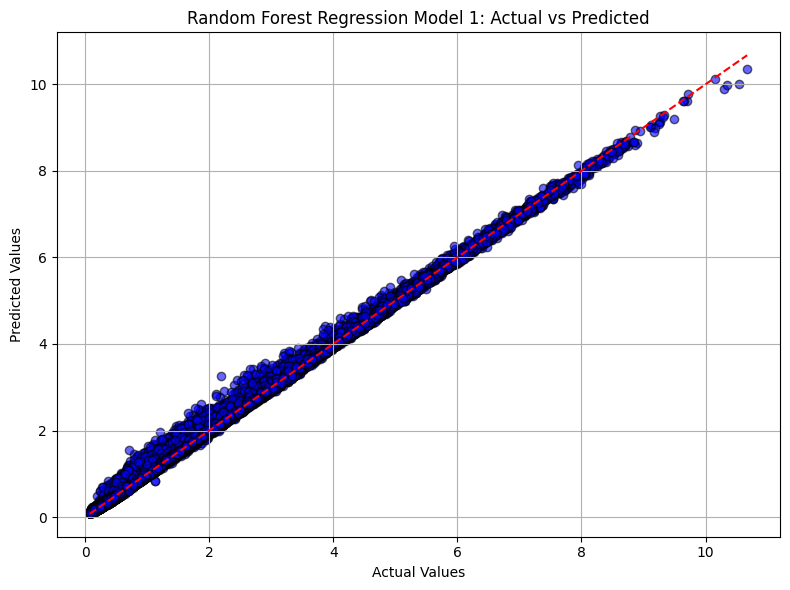

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred1_gb, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

MODEL 2

In [58]:
X = df.drop(columns=['Global_intensity','Sub_metering_3'])
y = df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [59]:
model_2_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_2_gb.fit(X_train, y_train)
y_pred2_gb = model_2_gb.predict(X_test) 
y_pred2_gb

array([6.26235077, 1.81292294, 2.85251645, ..., 9.40039673, 9.71744931,
       7.36574655], shape=(676263,))

In [60]:
print("Gradient Boosting Regression MODEL 2:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred2_gb))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred2_gb))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred2_gb)))
print("R2 Score:",r2_score(y_test, y_pred2_gb))

Gradient Boosting Regression MODEL 2:
Mean Absolute Error: 0.08749844083649701
Mean Squared Error: 0.02060033861950345
Root Mean Squared Error: 0.1435281805761623
R2 Score: 0.9989594051926688


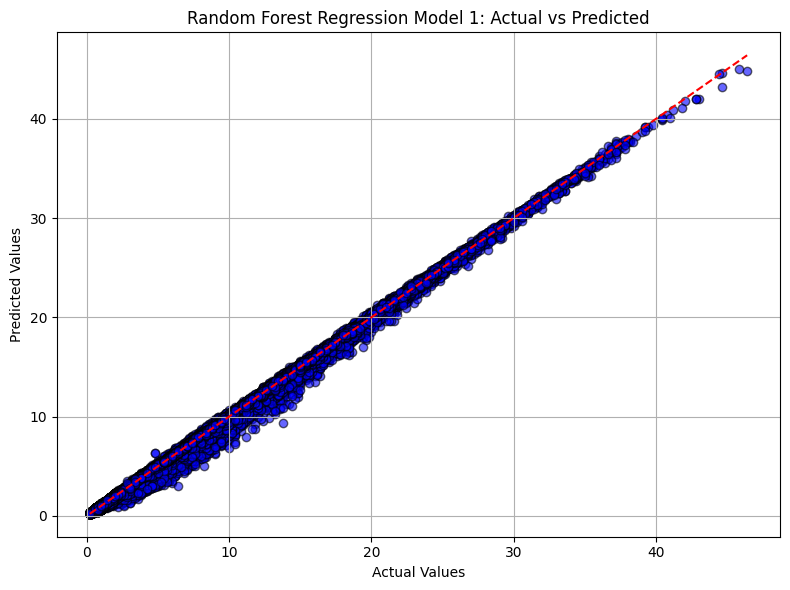

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred2_gb, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

MODEL 3

In [62]:
X = df.drop(columns=['Global_intensity'])
y = df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [63]:
model_3_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_3_gb.fit(X_train, y_train)
y_pred3_gb = model_3_gb.predict(X_test) 
y_pred3_gb

array([6.26165064, 1.81291889, 2.86063995, ..., 9.39133104, 9.75151535,
       7.38524287], shape=(676263,))

In [64]:
print("Gradient Boosting Regression MODEL 3:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred3_gb))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred3_gb))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred3_gb)))
print("R2 Score:",r2_score(y_test, y_pred3_gb))

Gradient Boosting Regression MODEL 3:
Mean Absolute Error: 0.08736797234031086
Mean Squared Error: 0.020418478032726464
Root Mean Squared Error: 0.14289323998260542
R2 Score: 0.9989685916039096


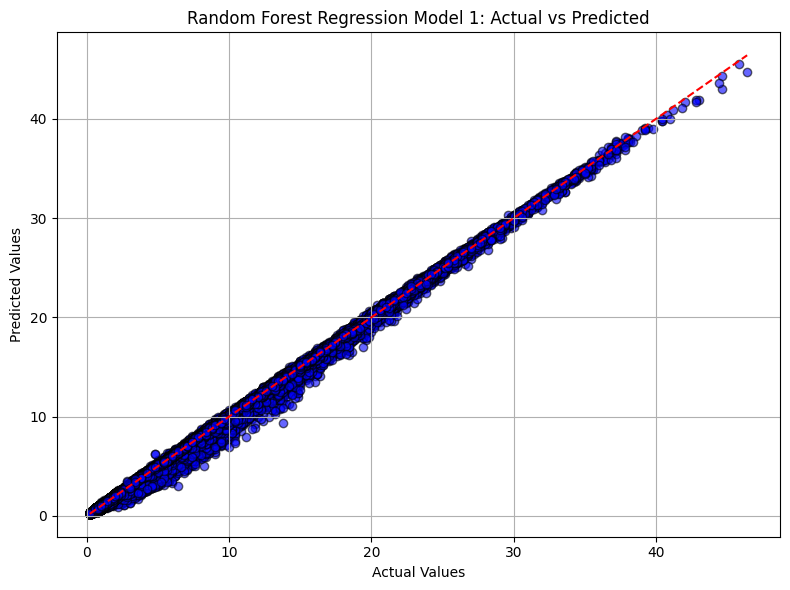

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred3_gb, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

4.Neural Networks

MODEL 1

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Global_active_power','Sub_metering_3'])
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
model_1_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_1_nn.fit(X_train, y_train)
y_pred1_nn = model_1_nn.predict(X_test)


In [68]:
print("Neural Network Regression MODEL 1:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred1_nn))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred1_nn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred1_nn)))
print("R2 Score:",r2_score(y_test, y_pred1_nn))


Neural Network Regression MODEL 1:
Mean Absolute Error: 0.056762289234996384
Mean Squared Error: 0.004322274295148123
Root Mean Squared Error: 0.06574400577351613
R2 Score: 0.9961421715353311


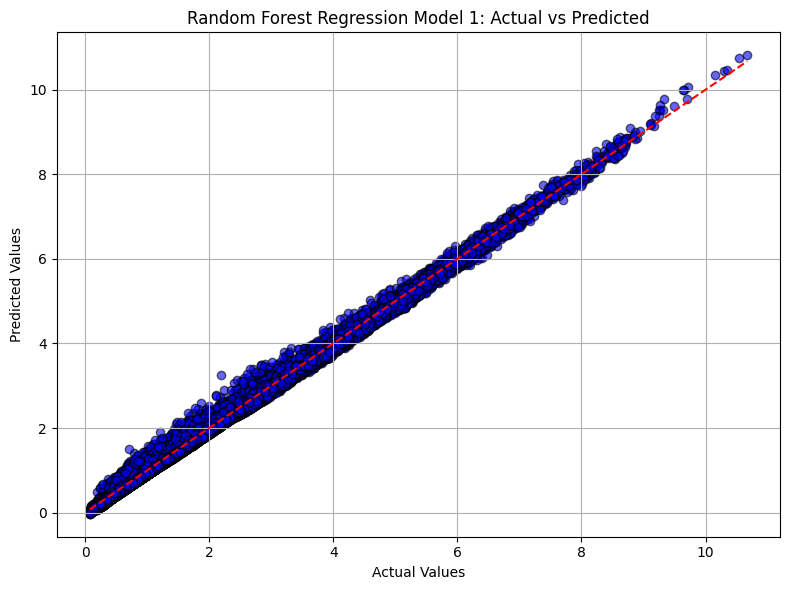

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred1_nn, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

MODEL 2

In [70]:

X = df.drop(columns=['Global_intensity','Sub_metering_3'])
y = df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
model_2_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_2_nn.fit(X_train, y_train)
y_pred2_nn = model_2_nn.predict(X_test)

In [72]:
print("Neural Network Regression MODEL 2:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred2_nn))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred2_nn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred2_nn)))
print("R2 Score:",r2_score(y_test, y_pred2_nn))

Neural Network Regression MODEL 2:
Mean Absolute Error: 0.3414900586347106
Mean Squared Error: 0.13143445610787124
Root Mean Squared Error: 0.3625389028888779
R2 Score: 0.9933607881376882


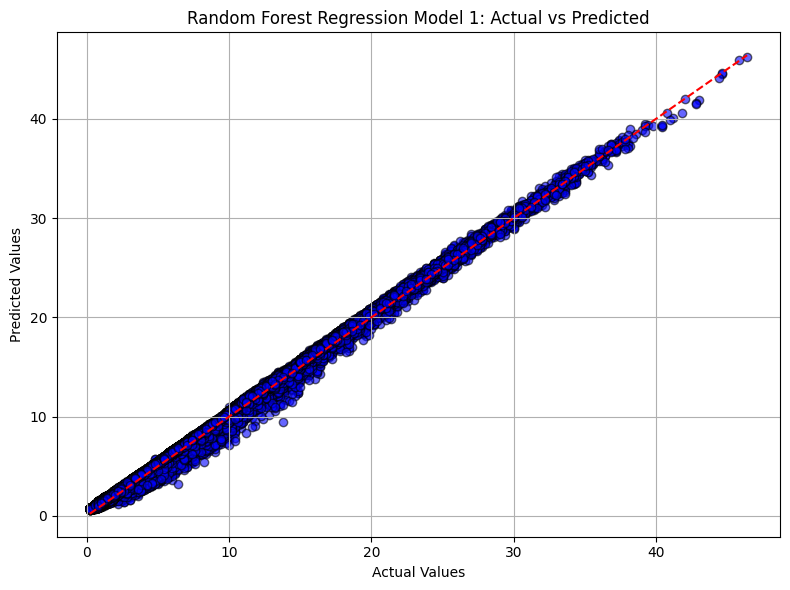

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred2_nn, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

MODEL 3

In [74]:
X = df.drop(columns=['Global_intensity'])
y = df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
model_3_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_3_nn.fit(X_train, y_train)
y_pred3_nn = model_3_nn.predict(X_test)

In [76]:
print("Neural Network Regression MODEL 3:")
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred3_nn))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred3_nn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred3_nn)))
print("R2 Score:",r2_score(y_test, y_pred3_nn))

Neural Network Regression MODEL 3:
Mean Absolute Error: 0.2622748657598289
Mean Squared Error: 0.08237426749638127
Root Mean Squared Error: 0.28700917667625414
R2 Score: 0.9958389890283993


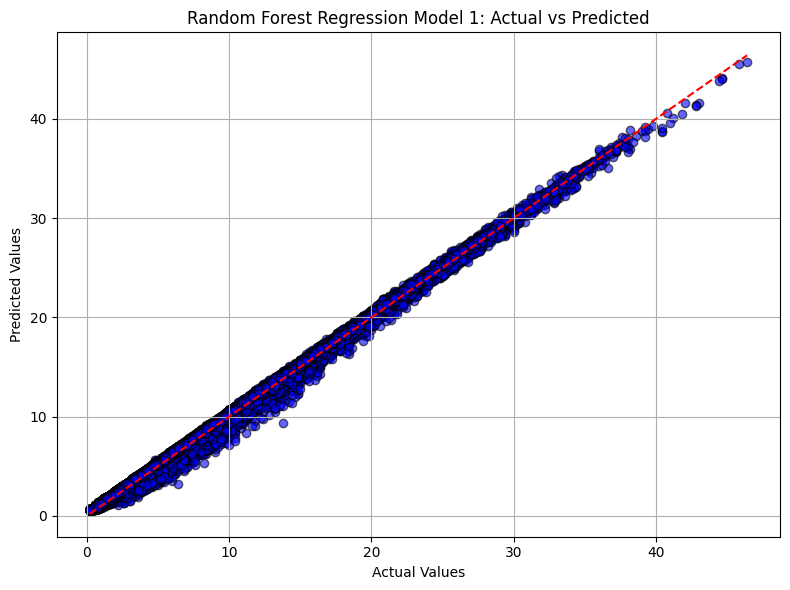

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred3_nn, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Random Forest Regression Model 1: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()